In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [ ]:
def get_data(filename):
    with open(filename) as training_file:
      reader=csv.reader(training_file,delimiter=',')
      imgs=[]
      labels=[]
      next(reader,None)

      for row in reader:
        label = row[0]
        data = row[1:]
        img = np.array(data).reshape((28,28))
        imgs.append(img)
        labels.append(label)

      images=np.array(imgs).astype(float)
      labels=np.array(labels).astype(float)

    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)
train_datagen = ImageDataGenerator(
    rescale=1.0/ 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.250,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32
)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(26,activation='sigmoid')    
]) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('val_acc')>=0.95):
      print('\n 95 percent validation accuracy reached so stopping the training')
      self.model.stop_training=True

callbacks=MyCallback()

In [ ]:
history = model.fit(train_generator,epochs=50,verbose=1,validation_data=validation_generator,callbacks=[callbacks])

model.evaluate(testing_images, testing_labels)

Epoch 1/50
858/858 [==============================] - 10s 11ms/step - loss: 2.7235 - acc: 0.1670 - val_loss: 2.3589 - val_acc: 0.2072
Epoch 2/50
858/858 [==============================] - 9s 11ms/step - loss: 2.0172 - acc: 0.3575 - val_loss: 1.5328 - val_acc: 0.4299
Epoch 3/50
858/858 [==============================] - 9s 11ms/step - loss: 1.5848 - acc: 0.4880 - val_loss: 1.2542 - val_acc: 0.5367
Epoch 4/50
858/858 [==============================] - 9s 11ms/step - loss: 1.3336 - acc: 0.5677 - val_loss: 0.9257 - val_acc: 0.6716
Epoch 5/50
858/858 [==============================] - 10s 12ms/step - loss: 1.1623 - acc: 0.6121 - val_loss: 0.7731 - val_acc: 0.7232
Epoch 6/50
858/858 [==============================] - 10s 12ms/step - loss: 1.0333 - acc: 0.6583 - val_loss: 0.7562 - val_acc: 0.7387
Epoch 7/50
858/858 [==============================] - 10s 11ms/step - loss: 0.9301 - acc: 0.6903 - val_loss: 0.6505 - val_acc: 0.7652
Epoch 8/50
858/858 [==============================] - 9s 11ms/ste

[335.30279541015625, 0.594394862651825]

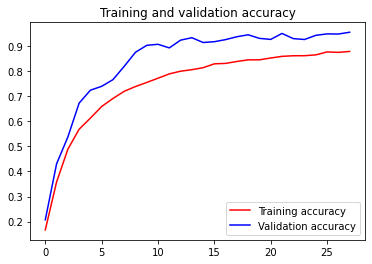

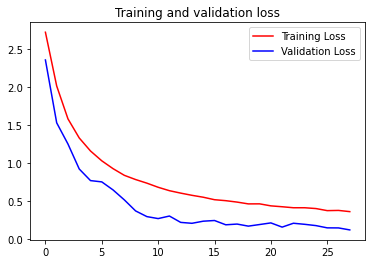

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()